**Tutorial Source 1:** https://ibis-project.org/posts/ibis-overturemaps/

**Installation**

In [20]:
#!pip install duckdb>=1.1.1
#!pip install ibis-framework[duckdb,geospatial]
#!pip install lonboard
#!pip install ipywidgets #if widgets do not display such as progress bar

**Download Data**

In [22]:
import ibis #for analytical queries
from ibis import _ #_ refers to deferred expression which can be executed later (e.g. execute())

con = ibis.get_backend() # default duckdb backend which is fast and lightweight (but others include PostgreSQL, BigQuery)

In [23]:
#theme = base (others include addresses, buildings, divisions, places and transportation)
#https://docs.overturemaps.org/guides/
#type = infrastructure (others include land, land_cover, land_use and water)
#https://docs.overturemaps.org/guides/base/
#* is a wildcard used to include all files within the directory (type = infrastructure)
url = (
    "s3://overturemaps-us-west-2/release/2024-11-13.0/theme=base/type=infrastructure/*"
)

#con refers to connection to the DuckDB backend using Ibis
#table-name is used to assign the name to the table created
t = con.read_parquet(url, table_name="infra-usa") 

#filter for USA bounding box, subtype="power", and selecting only few columns
expr = t.filter(
    _.bbox.xmin > -125.0,
    _.bbox.ymin > 24.8,
    _.bbox.xmax < -65.8,
    _.bbox.ymax < 49.2,
    _.subtype == "power",
).select(["names", "geometry", "bbox", "class", "sources", "source_tags"])

In [24]:
con.to_parquet(expr, "power-infra-usa.geoparquet")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

**Data Exploration**

In [26]:
#turn interactive mode on
ibis.options.interactive = True

In [27]:
#read file and show fields
usa_power_infra = con.read_parquet("power-infra-usa.geoparquet")
usa_power_infra

┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ names ┃ geometry                                                                         ┃ bbox                                                               ┃ class       ┃ sources                                                                          ┃ source_tags                                            ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ stru… │ geospatial:geometry                                                              │ struct<xmin: float32, xmax: float32, ymin: float32, ymax: float32> │ string      │ array<struct<property: string, dataset: string, record_id: string, update_time:… │ map<string, string>                                    │
├───────┼──────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┼─────────────┼──────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────┤
│ NULL  │ <POINT (-114.291 27.151)>                                                        │ {'xmin': -114.29095458984375, 'xmax': -114.29093933105469, ... +2} │ power_tower │ [{...}]                                                                          │ {'power': 'tower'}                                     │
│ NULL  │ <POINT (-114.289 27.149)>                                                        │ {'xmin': -114.28852844238281, 'xmax': -114.28851318359375, ... +2} │ power_tower │ [{...}]                                                                          │ {'power': 'tower'}                                     │
│ NULL  │ <POINT (-114.29 27.15)>                                                          │ {'xmin': -114.29006958007812, 'xmax': -114.29005432128906, ... +2} │ power_tower │ [{...}]                                                                          │ {'power': 'tower'}                                     │
│ NULL  │ <POINT (-114.29 27.151)>                                                         │ {'xmin': -114.2900619506836, 'xmax': -114.29004669189453, ... +2}  │ power_tower │ [{...}]                                                                          │ {'power': 'tower'}                                     │
│ NULL  │ <POLYGON ((-114.29 27.152, -114.291 27.151, -114.29 27.15, -114.29 27.151, -...> │ {'xmin': -114.29100036621094, 'xmax': -114.28948974609375, ... +2} │ substation  │ [{...}]                                                                          │ {'location': 'outdoor', 'power': 'substation', ... +1} │
│ NULL  │ <POINT (-114.291 27.151)>                                                        │ {'xmin': -114.29055786132812, 'xmax': -114.29054260253906, ... +2} │ portal      │ [{...}]                                                                          │ {'power': 'portal'}                                    │
│ NULL  │ <POINT (-114.291 27.152)>                                                        │ {'xmin': -114.29069519042969, 'xmax': -114.29067993164062, ... +2} │ power_tower │ [{...}]                                                                          │ {'power': 'tower'}                                     │
│ NULL  │ <POINT (-114.288 27.151)>                                                        │ {'xmin': -114.28756713867188, 'xmax': -114.28755187988281, ... +2} │ power_tower │ [{...}]                         

In [28]:
#rename class column to prevent possible conflicts
usa_power_infra = usa_power_infra.rename(infra_class="class")

In [29]:
#preview the different infrastructure classes
usa_power_infra.infra_class.value_counts().order_by(
    ibis.desc("infra_class_count")
).preview(max_rows=15)

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ infra_class   ┃ infra_class_count ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ string        │ int64             │
├───────────────┼───────────────────┤
│ power_pole    │           3146464 │
│ power_tower   │           2617289 │
│ generator     │            969469 │
│ power_line    │            256084 │
│ minor_line    │            120838 │
│ substation    │             65962 │
│ portal        │             61431 │
│ switch        │             54421 │
│ transformer   │             52527 │
│ plant         │             12605 │
│ cable         │              5390 │
│ catenary_mast │              3019 │
│ insulator     │              1713 │
│ connection    │              1225 │
│ terminal      │               415 │
│ …             │                 … │
└───────────────┴───────────────────┘

In [30]:
#filter out the classes of interest (e.g. plant, power_line and minor_line)
plants = usa_power_infra.filter(_.infra_class=="plant")
power_lines = usa_power_infra.filter(_.infra_class=="power_line")
minor_lines = usa_power_infra.filter(_.infra_class=="minor_line")

**Data Visualisation**

In [32]:
import lonboard
from lonboard.basemap import CartoBasemap # to choose color of basemap

In [33]:
#plot power plants
lonboard.viz(
    plants,
    scatterplot_kwargs={"get_fill_color": "red"}, #visualisation of scatter plots
    polygon_kwargs={"get_fill_color": "red"}, #visualisation of polygons
    map_kwargs={
        "basemap_style": CartoBasemap.Positron, #basemap to be light and minimalistic
        "view_state": {"longitude": -100, "latitude": 36, "zoom": 3}, #initial view settings
    },
)

D:\anaconda3\Lib\site-packages\lonboard\_geoarrow\ops\reproject.py:33: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


Map(basemap_style=<CartoBasemap.Positron: 'https://basemaps.cartocdn.com/gl/positron-gl-style/style.json'>, cu…

In [34]:
#to plot a smaller area (e.g. part of California), the following code can be inserted to the above code
#plants_CA = plants.filter(
#    _.bbox.xmin.between(-118.6, -117.9), _.bbox.ymin.between(34.5, 35.3)
#).select(_.names.primary, _.geometry)

In [35]:
lonboard.viz([minor_lines, power_lines])

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…

In [36]:
#numer of power lines
power_lines.geometry.n_points().sum()

┌─────────┐
│ 5353606 │
└─────────┘

In [37]:
#numer of minor lines
minor_lines.geometry.n_points().sum()

┌─────────┐
│ 1539579 │
└─────────┘

Application to New Study Area 1

In [39]:
#theme = base (others include addresses, buildings, divisions, places and transportation)
#https://docs.overturemaps.org/guides/
#type = infrastructure (others include land, land_cover, land_use and water)
#https://docs.overturemaps.org/guides/base/
#* is a wildcard used to include all files within the directory (type = infrastructure)
url = (
    "s3://overturemaps-us-west-2/release/2024-11-13.0/theme=base/type=infrastructure/*"
)

#con refers to connection to the DuckDB backend using Ibis
#table-name is used to assign the name to the table created
t = con.read_parquet(url, table_name="infra-japan") 

#filter for Japan bounding box, subtype="power", and selecting only few columns
expr = t.filter(
    _.bbox.xmin > 122.9346,  
    _.bbox.ymin > 24.396308,  
    _.bbox.xmax < 153.9866,  
    _.bbox.ymax < 45.551483,
    _.subtype == "power",
).select(["names", "geometry", "bbox", "class", "sources", "source_tags"])

In [40]:
con.to_parquet(expr, "power-infra-japan.geoparquet")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [41]:
#turn interactive mode on
ibis.options.interactive = True

In [42]:
#read file and show fields
japan_power_infra = con.read_parquet("power-infra-japan.geoparquet")
japan_power_infra

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ names                                                                            ┃ geometry                                                                         ┃ bbox                                                               ┃ class     ┃ sources                                                                          ┃ source_tags                                                                         ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ struct<primary: string, common: map<string, string>, rules: array<struct<varian… │ geospatial:geometry                                                              │ struct<xmin: float32, xmax: float32, ymin: float32, ymax: float32> │ string    │ array<struct<property: string, dataset: string, record_id: string, update_time:… │ map<string, string>                                                                 │
├──────────────────────────────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┼───────────┼──────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────┤
│ {'primary': '与那国風車2号機', 'common': None, ... +1}                           │ <POINT (123.034 24.462)>                                                         │ {'xmin': 123.03370666503906, 'xmax': 123.03372192382812, ... +2}   │ generator │ [{...}]                                                                          │ {'generator:method': 'wind_turbine', 'generator:source': 'wind', ... +1}            │
│ {'primary': '与那国風車1号機', 'common': None, ... +1}                           │ <POINT (123.035 24.462)>                                                         │ {'xmin': 123.03509521484375, 'xmax': 123.03511047363281, ... +2}   │ generator │ [{...}]                                                                          │ {'generator:method': 'wind_turbine', 'generator:source': 'wind', ... +1}            │
│ NULL                                                                             │ <POLYGON ((124.28 24.502, 124.28 24.502, 124.28 24.502, 124.28 24.502, 124.2...> │ {'xmin': 124.27980041503906, 'xmax': 124.28009033203125, ... +2}   │ generator │ [{...}]                                                                          │ {'generator:method': 'photovoltaic', 'generator:output:electricity': 'yes', ... +3} │
│ NULL                                                                             │ <POLYGON ((124.296 24.566, 124.295 24.566, 124.296 24.566, 124.296 24.566, 1...> │ {'xmin': 124.29539489746094, 'xmax': 124.29615020751953, ... +2}   │ generator │ [{...}]                                                                          │ {'generator:method': 'photovoltaic', 'generator:source': 'solar', ... +1}           │
│ NULL                                                                             │ <POLYGON ((124.297 24.567, 124.297 24.567, 124.297 24.567, 124.297 24.567, 1...> │ {'xmin': 124.29652404785156, 'xmax': 124.29727935791016, ... +2}   │ generator │ [{.

In [43]:
#rename class column to prevent possible conflicts
japan_power_infra = japan_power_infra.rename(infra_class="class")

In [44]:
#preview the different infrastructure classes
japan_power_infra.infra_class.value_counts().order_by(
    ibis.desc("infra_class_count")
).preview(max_rows=15)

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ infra_class   ┃ infra_class_count ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ string        │ int64             │
├───────────────┼───────────────────┤
│ power_tower   │            402163 │
│ generator     │            118925 │
│ power_line    │             37571 │
│ power_pole    │             27486 │
│ plant         │             15289 │
│ substation    │              9949 │
│ portal        │              7900 │
│ transformer   │              2336 │
│ minor_line    │              1566 │
│ cable         │              1159 │
│ switch        │              1036 │
│ catenary_mast │               725 │
│ terminal      │               233 │
│ insulator     │                49 │
│ connection    │                13 │
│ …             │                 … │
└───────────────┴───────────────────┘

In [45]:
#filter out the classes of interest (e.g. plant, power_line and minor_line)
plants = japan_power_infra.filter(_.infra_class=="plant")
power_lines = japan_power_infra.filter(_.infra_class=="power_line")
minor_lines = japan_power_infra.filter(_.infra_class=="minor_line")

In [46]:
#plot power plants
lonboard.viz(
    plants,
    scatterplot_kwargs={"get_fill_color": "red"}, #visualisation of scatter plots
    polygon_kwargs={"get_fill_color": "red"}, #visualisation of polygons
    map_kwargs={
        "basemap_style": CartoBasemap.Positron, #basemap to be light and minimalistic
        "view_state": {"longitude": 137.0, "latitude": 37.5, "zoom": 5}, #initial view settings
    },
)

Map(basemap_style=<CartoBasemap.Positron: 'https://basemaps.cartocdn.com/gl/positron-gl-style/style.json'>, cu…

In [47]:
lonboard.viz([minor_lines, power_lines])

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…

In [48]:
#numer of power lines
power_lines.geometry.n_points().sum()

┌────────┐
│ 484895 │
└────────┘

In [49]:
#numer of minor lines
minor_lines.geometry.n_points().sum()

┌───────┐
│ 12930 │
└───────┘

Application to New Study Area 2

**Tutorial Source 2:** https://developmentseed.org/lonboard/latest/examples/overture-maps/

In [52]:
import numpy as np
import overturemaps
from matplotlib.colors import LogNorm
from palettable.colorbrewer.sequential import *
#use * so wildcard and can import all

from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_continuous_cmap

In [53]:
#obtain bbox for Manhattan
#https://boundingbox.klokantech.com/ to find bounding box of other areas
bbox = -74.02169, 40.696423, -73.891338, 40.831263

In [54]:
#fetches relevant data from the cloud
table = overturemaps.record_batch_reader("building", bbox).read_all()

In [55]:
#convert the "height" column to numpy array and replace any null values with 1
heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [56]:
#LogNorm to ensure very tall buildings do not overshadow shorter builddings
normalizer = LogNorm(1, heights.max(), clip = True) #clip=True to fit within min and max value to prevent extreme values
normalized_heights = normalizer(heights) #apply the normalizer to the height array

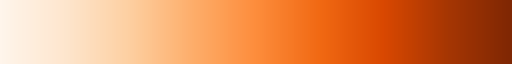

In [57]:
#show the colour map
Oranges_9.mpl_colormap

In [58]:
#apply height values onto the colourmap using apply_continuous_cmap
colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [59]:
#create PolygonLayer, passing in the heights and colours from before
layer = PolygonLayer(
    #select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)

D:\anaconda3\Lib\site-packages\lonboard\_geoarrow\ops\reproject.py:33: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


In [60]:
#view the map
view_state = {
    "longitude": -73.98416810282863,
    "latitude": 40.72651721370669,
    "zoom": 12.726630492730596,
    "pitch": 59.80465353190481,
    "bearing": 13.243243243243244,
}
m = Map(layer, view_state=view_state)
m

Map(custom_attribution='', layers=(PolygonLayer(extruded=True, get_elevation=arro3.core.ChunkedArray<Float32>
…

Application to New Study Area

In [62]:
#obtain bbox for London
#https://boundingbox.klokantech.com/ to find bounding box of other areas
bbox = -0.510375, 51.286760, 0.334015, 51.691874

In [63]:
#fetches relevant data from the cloud
table = overturemaps.record_batch_reader("building", bbox).read_all()

In [64]:
#convert the "height" column to numpy array and replace any null values with 1
heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [65]:
#LogNorm to ensure very tall buildings do not overshadow shorter builddings
normalizer = LogNorm(1, heights.max(), clip = True) #clip=True to fit within min and max value to prevent extreme values
normalized_heights = normalizer(heights) #apply the normalizer to the height array

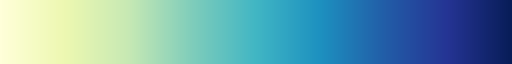

In [66]:
#show the colour map
#other colours available from https://jiffyclub.github.io/palettable/colorbrewer/sequential/
YlGnBu_9.mpl_colormap

In [67]:
#apply height values onto the colourmap using apply_continuous_cmap
colors = apply_continuous_cmap(normalized_heights, YlGnBu_9)

In [68]:
#create PolygonLayer, passing in the heights and colours from before
layer = PolygonLayer(
    #select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)

In [113]:
#view the map
view_state = {
    "longitude": -0.1278,  #longitude of London’s center
    "latitude": 51.5074,   #latitude of London’s center
    "zoom": 11.5,           #zoom level
    "pitch": 59.8,          #pitch
    "bearing": 13.24,       #bearing
}

m = Map(layer, view_state=view_state)
m

Map(custom_attribution='', layers=(PolygonLayer(extruded=True, get_elevation=arro3.core.ChunkedArray<Float32>
…